[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_SL_WS2324.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is, of course, cluster analysis. However, to warm up, we start with some more exercises on Python programming.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Demo notebook 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next, generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linspace()` for this purpose. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# values for random variable X

x = np.linspace(start=-4, stop=4, num=250)


Next, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *stats models library*, which we import below. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable with name **nvValues**.

In [4]:
# Compute the density of the normal distribution at x
x = np.linspace(start=-4, stop=4, num=250)
nvValues = stats.norm.pdf(x=x, loc=0, scale=1)
nvValues1 = stats.norm.pdf(x=x, loc=0, scale=2)
nvValues2 = stats.norm.pdf(x=x, loc=0, scale=3)


We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

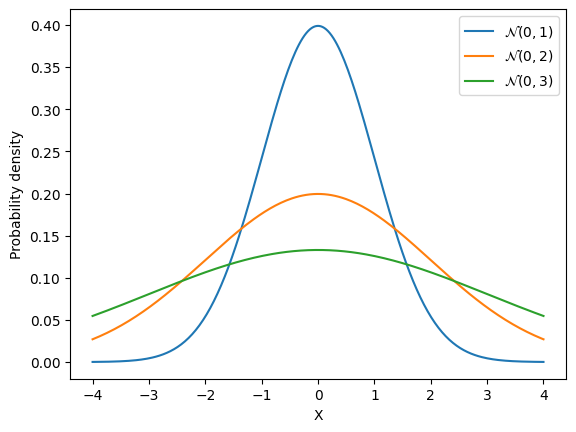

In [6]:
# Code for plotting

plt.plot(x, nvValues, label='$\mathcal{N}(0,1)$')
plt.plot(x, nvValues1, label='$\mathcal{N}(0,2)$')
plt.plot(x, nvValues2, label='$\mathcal{N}(0,3)$')

plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend(loc='best')
plt.show()

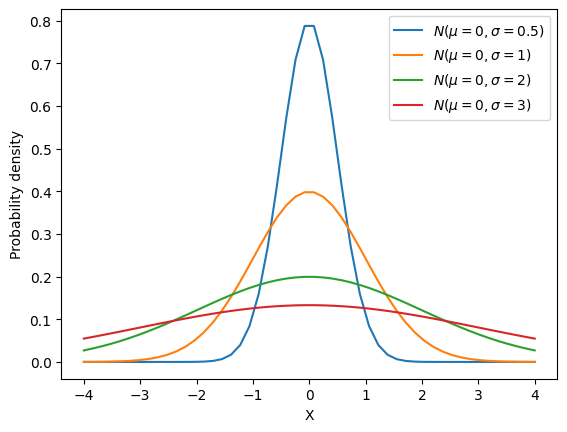

In [7]:
# A nicer version of the previous solution that avoids copy/pasting code blocks

mu = [0, 0, 0, 0]
sig = [0.5, 1, 2, 3]

n = 100

X = np.linspace(start=-4, stop=4)

for i,s in enumerate(sig):
    pdf = stats.norm.pdf(x=X, loc=mu[i], scale=s)
    lab = f'$N(\mu={mu[i]}, \sigma={sig[i]})$'
    plt.plot(X, pdf, label=lab)
    
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend(loc='best')

plt.show()
    

## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Demo notebook 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/demo_notebooks/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

(200, 2)


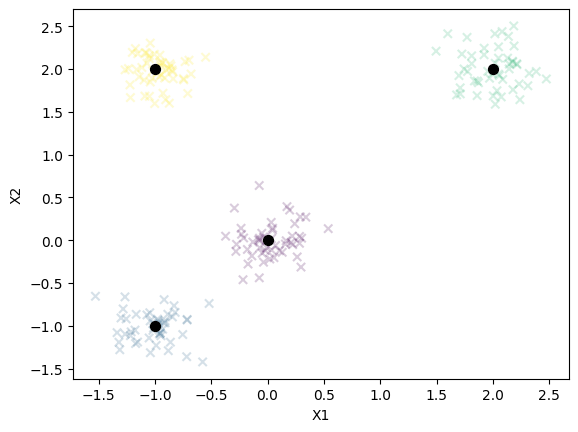

In [20]:
# Generate data for clustering
from sklearn.datasets import make_blobs

our_centers = np.array([ [0,0], [-1, -1], [2, 2], [-1, 2] ])
                                        

X, y = make_blobs(n_samples=200, random_state=888, centers=our_centers, cluster_std=0.2)
print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, marker='x',  alpha=0.2)

plt.scatter(our_centers[:, 0], our_centers[:, 1], c='k', s=50)

plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

## 2.2 kMeans
Our GitHub repository provides a *from scratch* implementation of the kMeans algorithm. Below you find the code that we will need for this exercise. For more details visit the corresponding [kMeans from scratch notebook](https://github.com/Humboldt-WI/bads/blob/master/algorithms_from_scratch/kmeans.ipynb).

In [ ]:
# The following functions are copy/pasted from the kMeans from scratch notebook

def euclidean_distance(a, b):
    """Computes Euclidean distance between two arrays"""
    return np.sqrt(np.sum((a - b)**2))


def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    # creates empty array as long as samples for future labels
    labels = np.empty(n_samples)  

    for cluster_idx, cluster in enumerate(clusters):
        # assign labels to each sample
        for sample_index in cluster:
            labels[sample_index] = cluster_idx  
    return labels


def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)]  # creates a list of K number of lists
    for idx, sample in enumerate(X):
        # find closest centroid for each sample
        centroid_idx = find_closest_centroid(sample, centroids)
        # create index list of closest centroids
        clusters[centroid_idx].append(idx)
    return clusters


def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    # calculate distance from each sample to each centroid
    distances = [euclidean_distance(sample, point) for point in centroids]  
    # take closest centroid (one with minimal distance)
    closest_index = np.argmin(distances)
    return closest_index


def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        # find new centroid by finding mean of all points assigned to centroid
        cluster_mean = np.mean(X[cluster, :], axis=0)
        centroids[cluster_idx] = cluster_mean  # collect all centroids
    return centroids


def is_converged(centroids_old, centroids, K):
    """Check if centroids have changed since last iteration"""
    # check distance between old and new centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(K)]
    # return Boolean indicating whether centroids are the same as before or not
    return sum(distances) == 0


def KMeans_single(X, K=5, max_iters=100):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape

    # Initialization
    # take random sample points to be initial clusters
    random_sample_idx = np.random.choice(n_samples, K, replace=False)
    # label these points as centroids
    centroids = [X[idx] for idx in random_sample_idx]

    iteration_num = 0  # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):

        iteration_num += 1  # track iterations required

        # assignment to closest centroids (cluster creation)
        clusters = create_clusters(K, X, centroids)

        centroids_old = centroids  # archive previous centroids
        centroids = update_centroids(
            X, K, n_features, clusters)  # Updating centroids

       # Convergence Confirmation
        # check if last iteration's centroids were the same as current iteration
        if is_converged(centroids_old, centroids, K):
            break  # exit loop since there was no change since last iteration

    # Clustering has converged or we have hit the max number of iteration:
    # Determine current cluster solution
    # classify samples as the index of their clusters
    labels = label_cluster(n_samples, clusters)
    # get distance from each point to its centroid
    dist = [euclidean_distance(X[row_num], centroids[int(labels[row_num])])
            for row_num in range(X.shape[0])]
    # total distance calculated as sum of squares
    total_dist = np.sum(np.square(dist))

    # Classify samples as the index of their clusters
    return labels, iteration_num, centroids, total_dist


def KMeans_from_scratch(data, k_clusters, n_iter=10):

    for i in range(n_iter):

        # run KMeans once
        labels, iteration_num, centroids, dist = KMeans_single(
            data, K=k_clusters)

        # save results if they are the best so far
        if 'best_dist' not in locals() or dist < best_dist:

            best_labels = labels
            best_iter = iteration_num
            best_centroids = centroids
            best_dist = dist

    return best_labels, best_iter, best_centroids, best_dist


Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

In [ ]:
# Clustering of the artificial data
k = 4


## 2.3 Distance function
In the lecture, we argued that clustering methods like kMeans are versatile in that they support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. We have discussed cosine similarity in class, here is the slide to remind you.

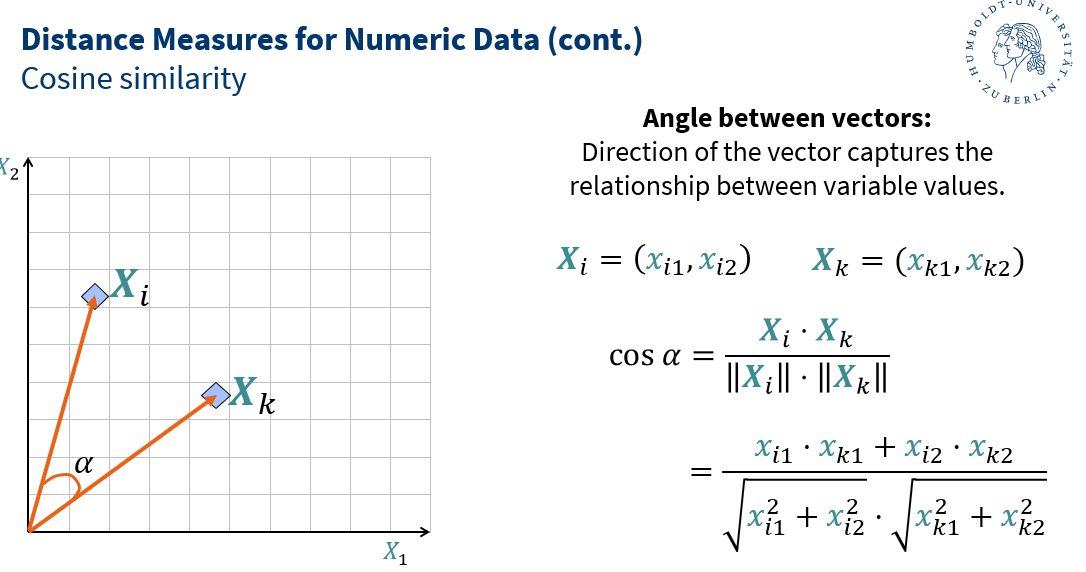

Define a custom Python function to implement cosine similarity. Test your function by calculating cosine similarity between the two vectors $a, b$
```Python
a = np.array([1, 0.1])
b = np.array([1, 0.5])
```

In [ ]:
# Define a function that computes cosine similarity


In [ ]:
# Testing our cosine similarity function


Next thing to do is to change our from scratch implementation of the kMeans algorithm such that it uses cosine similarity for clustering the data. To achieve this, write a new custom function `KMeans_with_cosine_similarity`. You can copy/paste the above implementation of the function `KMeans_from_scratch` to a large extent, and then add adjustments to exchange Euclidian distance with cosine distance. 

**Hint:** We aware of the fact that a similarity function and a distance function are two sides of the same coin but not identical. Once you are able to compute cosine *similarity* you need to adjust your *similarity* measure to obtain a *distance* measure. Afterwards, you can use conside *distance* within kMeans.

In [ ]:
# kMeans with cosine similarity


In [9]:
import numpy as np

def my_kMeans(X, K, maxIters = 100):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C

centroids, c = my_kMeans(X, 4)

In [19]:
print(X[0])
print(centroids[0])
print(X[0]-centroids[0])
np.dot(X[0]-centroids[0], X[0]-centroids[0])

[1.29737024 0.45107888]
[ 0.43122811 -0.66344279]
[0.86614213 1.11452167]


1.9923607553504723

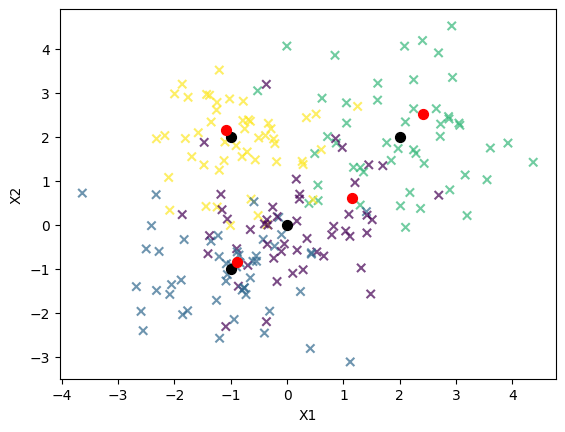

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, marker='x',  alpha=0.7)
plt.scatter(our_centers[:, 0], our_centers[:, 1], c='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=1)

plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [ ]:
# Create cluster solution with the modified kMeans


In [ ]:
# Write some code to compare the two cluster solutions from using Euclidean distance and cosine similarity 


# 2.5 Alternative approach
The kMeans algorithm with cosine similarity can also be implemented more elegantly by normalizing the rows of $X$ to be of unit length. The reason being that if $X_1$ and $X_2$ are unit vectors, the term inside the brackets in the last line of the following equation is equivalent to the cosine distance.

\begin{align*}
\vert\vert X_1 - X_2 \vert\vert_2^2 &= X_1^T X_1 + X_2^T X_2 - 2 X_1^T X_2 \\
&= 2 - 2 X_1^T X_2 \\
&= 2 (1 - X_1^T X_2)
\end{align*}

Normalize $X$ before computing kMeans clusters with Euclidian distances. Compare your solution to that from task 2.4 and briefly note your findings.

In [ ]:
# Normalize X and create cluster solution using kMeans with Euclidian distiance

In [ ]:
# Write some code to compare the cluster solution with the one from task 2.4 (cosine similarity)

## 2.6 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

# Done... puh, that was a lot of work. And you did it! Congratulations!!! 